# Tariff statistics

The task is to analyze data on customer usage of two different tariffs and test two hypotheses about the total revenue.

## Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

### Call data

In [2]:
try:
    calls = pd.read_csv('calls.csv')
except:
    calls = pd.read_csv('/datasets/calls.csv')

In [3]:
calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


<Axes: >

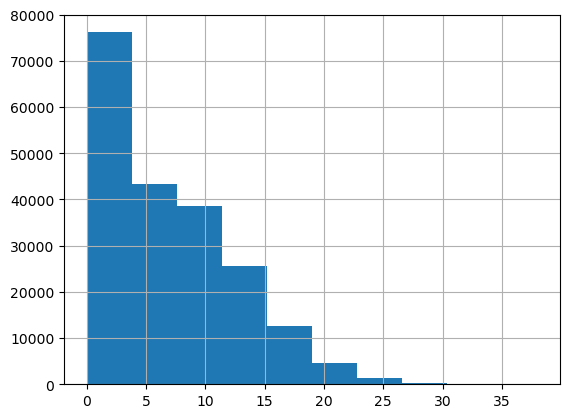

In [5]:
calls['duration'].hist()

### Mobile Internet usage data

In [6]:
try:
    sessions = pd.read_csv('internet.csv')
except:
    sessions = pd.read_csv('/datasets/internet.csv')

In [7]:
sessions.head(5)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [8]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


<Axes: >

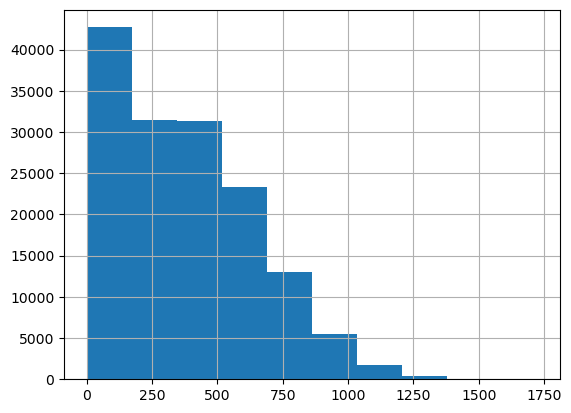

In [9]:
sessions['mb_used'].hist()

### SMS data

In [10]:
try:
    messages = pd.read_csv('messages.csv')
except:
    messages = pd.read_csv('/datasets/messages.csv')

In [11]:
messages.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [12]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


### Tariff data

In [13]:
try:
    tariffs = pd.read_csv('tariffs.csv')
except:
    tariffs = pd.read_csv('/datasets/tariffs.csv')

In [14]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [15]:
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


### User data

In [16]:
try:
    users = pd.read_csv('users.csv')
except:
    users = pd.read_csv('/datasets/users.csv')

In [17]:
users.head(5)

,user_id,age,churn_date,city,reg_date,tariff
0,1000,52,NaN,Krasnodar,2018-05-25,ultra
1,1001,41,NaN,Moscow,2018-11-01,smart
2,1002,59,NaN,Sterlitamak,2018-06-17,smart
3,1003,23,NaN,Moscow,2018-08-17,ultra
4,1004,68,NaN,Novokuznetsk,2018-05-14,ultra


In [18]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   reg_date    500 non-null    object
 5   tariff      500 non-null    object
dtypes: int64(2), object(4)
memory usage: 23.6+ KB


## Data preprocessing

Let's convert the dates to the `datetime` format .

In [19]:
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])

calls['call_date'] = pd.to_datetime(calls['call_date'])

messages['message_date'] = pd.to_datetime(messages['message_date'])
sessions['session_date'] = pd.to_datetime(sessions['session_date'])

Calls with zero duration are known to indicate missed calls.

Let's round up the duration of the calls to minutes.

In [20]:
calls['duration'] = np.ceil(calls['duration']).astype('int')

Let's remove the excessive index in the data about calls made.

In [21]:
sessions = sessions.drop(columns=['Unnamed: 0'])

It would be useful to put the month in a separate category.

In [22]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format = '%Y-%m-%d')
messages['message_date'] = pd.to_datetime(messages['message_date'], format = '%Y-%m-%d')
sessions['session_date'] = pd.to_datetime(sessions['session_date'], format = '%Y-%m-%d')

In [23]:
calls['month'] = calls['call_date'].dt.month
messages['month'] = messages['message_date'].dt.month
sessions['month'] = sessions['session_date'].dt.month

Let's calculate the number of calls, the number of minutes, the number of messages, and the number of spent megabytes for each user by month.

In [24]:
calls_per_month = calls.groupby(['user_id', 'month']).agg(calls=('duration', 'count'))
minutes_per_month = calls.groupby(['user_id', 'month']).agg(minutes=('duration', 'sum'))
messages_per_month = messages.groupby(['user_id', 'month']).agg(messages=('message_date', 'count'))
sessions_per_month = sessions.groupby(['user_id', 'month']).agg({'mb_used': 'sum'})

In [25]:
calls_per_month.head(10)

calls
user_id month       
1000    5         22
        6         43
        7         47
        8         52
        9         58
        10        57
        11        43
        12        46
1001    11        59
        12        63

In [26]:
minutes_per_month.head(10)

minutes
user_id month         
1000    5          159
        6          172
        7          340
        8          408
        9          466
        10         350
        11         338
        12         333
1001    11         430
        12         414

In [27]:
messages_per_month.head(10)

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57
        10           73
        11           58
        12           70
1002    6             4
        7            11

In [28]:
sessions_per_month.head(10)

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
        10     14702.49
        11     14756.47
        12      9817.61
1001    11     18429.34
        12     14036.66

## Data analysis and revenue calculation

Let's count the number of terminated contracts.

In [29]:
users['churn_date'].count() / users['churn_date'].shape[0] * 100

7.6

These 7.6% are good to know, but do not affect statistical analysis.

Let's merge the obtained data into the dataframe `user_behavior`.

In [30]:
user_behavior = calls_per_month\
    .merge(messages_per_month, left_index=True, right_index=True, how='outer')\
    .merge(sessions_per_month, left_index=True, right_index=True, how='outer')\
    .merge(minutes_per_month, left_index=True, right_index=True, how='outer')\
    .reset_index()\
    .merge(users, how='left', left_on='user_id', right_on='user_id')\

user_behavior.head()

,user_id,month,calls,messages,mb_used,minutes,age,churn_date,city,reg_date,tariff
0,1000,5,22.0,22.0,2253.49,159.0,52,NaT,Krasnodar,2018-05-25,ultra
1,1000,6,43.0,60.0,23233.77,172.0,52,NaT,Krasnodar,2018-05-25,ultra
2,1000,7,47.0,75.0,14003.64,340.0,52,NaT,Krasnodar,2018-05-25,ultra
3,1000,8,52.0,81.0,14055.93,408.0,52,NaT,Krasnodar,2018-05-25,ultra
4,1000,9,58.0,57.0,14568.91,466.0,52,NaT,Krasnodar,2018-05-25,ultra


And check the gaps in the table after the merge:

In [31]:
user_behavior.isna().sum()

user_id          0
month            0
calls           40
messages       497
mb_used         11
minutes         40
age              0
churn_date    3027
city             0
reg_date         0
tariff           0
dtype: int64

The resulting gaps in this case should be filed with zeros:

In [32]:
user_behavior['calls'] = user_behavior['calls'].fillna(0)
user_behavior['minutes'] = user_behavior['minutes'].fillna(0)
user_behavior['messages'] = user_behavior['messages'].fillna(0)
user_behavior['mb_used'] = user_behavior['mb_used'].fillna(0)

Now attaching information about the tariffs.

In [33]:
tariffs = tariffs.rename(columns={'tariff_name': 'tariff'}) # a shorter name is more handy
user_behavior = user_behavior.merge(tariffs, on='tariff')

Let's estimate the number of talk minutes, messages and megabytes that exceed the tariff plan.

In [34]:
user_behavior['paid_minutes'] = user_behavior['minutes'] - user_behavior['minutes_included']
user_behavior['paid_messages'] = user_behavior['messages'] - user_behavior['messages_included']
user_behavior['paid_mb'] = user_behavior['mb_used'] - user_behavior['mb_per_month_included']

for col in ['paid_messages', 'paid_minutes', 'paid_mb']:
    user_behavior.loc[user_behavior[col] < 0, col] = 0

To evaluate the overrun, we have to convert exceeding megabytes into gigabytes and put them in a separate column.

In [35]:
user_behavior['paid_gb'] = np.ceil(user_behavior['paid_mb'] / 1024).astype(int)

Let's calculate the revenue from minutes of talk, messaging and internet.

In [36]:
user_behavior['cost_minutes'] = user_behavior['paid_minutes'] * user_behavior['rub_per_minute']
user_behavior['cost_messages'] = user_behavior['paid_messages'] * user_behavior['rub_per_message']
user_behavior['cost_gb'] = user_behavior['paid_gb'] * user_behavior['rub_per_gb']

The monthly revenue for each user.

In [37]:
user_behavior['total_cost'] = \
      user_behavior['rub_monthly_fee']\
    + user_behavior['cost_minutes']\
    + user_behavior['cost_messages']\
    + user_behavior['cost_gb']

### Statistics

It eould be easier to collect statistics on «month-tariff» pairs into a separate dataframe `stats_df`.

In [38]:
# we take the mean, standard deviation and median into account
stats_df = user_behavior.pivot_table(
            index=['month', 'tariff'],
            values=['calls', 'minutes', 'messages', 'mb_used'],
            aggfunc=['mean', 'std', 'median'] 
).round(2).reset_index()

stats_df.columns=['month', 'tariff', 'calls_mean', 'sessions_mean', 'messages_mean', 'minutes_mean',
                                     'calls_std',  'sessions_std', 'messages_std', 'minutes_std', 
                                     'calls_median', 'sessions_median', 'messages_median',  'minutes_median']

stats_df.head(10)

,month,tariff,calls_mean,sessions_mean,messages_mean,minutes_mean,calls_std,sessions_std,messages_std,minutes_std,calls_median,sessions_median,messages_median,minutes_median
0,1,smart,27.68,8513.72,18.24,203.85,20.81,6444.68,16.20,154.23,20.5,7096.18,15.0,162.5
1,1,ultra,59.44,13140.68,33.78,428.11,41.64,6865.35,30.67,269.76,51.0,14791.37,32.0,382.0
2,2,smart,40.19,11597.05,24.09,298.69,25.39,6247.35,21.75,190.82,38.5,12553.71,20.0,258.0
3,2,ultra,41.54,11775.94,21.96,297.12,40.97,10644.64,26.77,296.51,25.0,7327.12,5.5,168.0
4,3,smart,54.32,15104.16,31.86,390.05,25.54,5828.24,26.80,191.89,59.0,15670.25,23.0,409.0
5,3,ultra,67.68,17535.55,32.30,489.65,44.84,10951.79,41.62,333.74,57.0,17495.18,20.0,403.0
6,4,smart,51.31,13462.18,30.74,367.13,25.70,5698.25,24.54,186.49,52.0,14087.65,28.0,368.5
7,4,ultra,64.09,16828.13,31.56,458.02,36.27,9718.65,37.51,267.68,61.0,16645.78,17.0,453.0
8,5,smart,55.24,15805.18,33.77,387.36,25.38,5978.23,27.04,186.60,59.0,16323.94,30.0,433.0
9,5,ultra,72.51,19363.15,37.85,510.33,41.08,10046.11,40.31,289.60,75.0,18696.43,25.0,519.0


### Calls

Let's plot the distribution of the mean number of calls by tariff type and month.

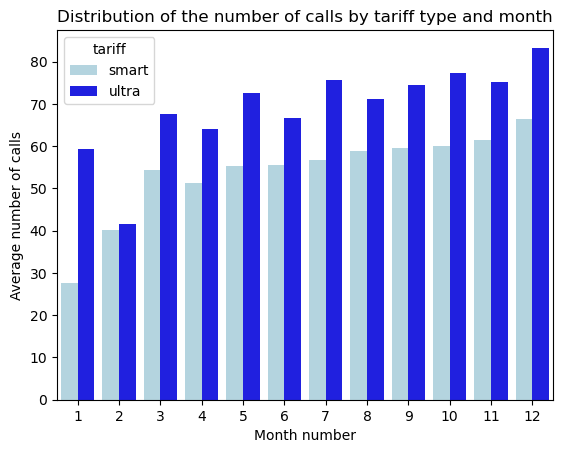

In [39]:
ax = sns.barplot(x='month',
            y='calls_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Distribution of the number of calls by tariff type and month')
ax.set(xlabel='Month number', ylabel='Average number of calls');

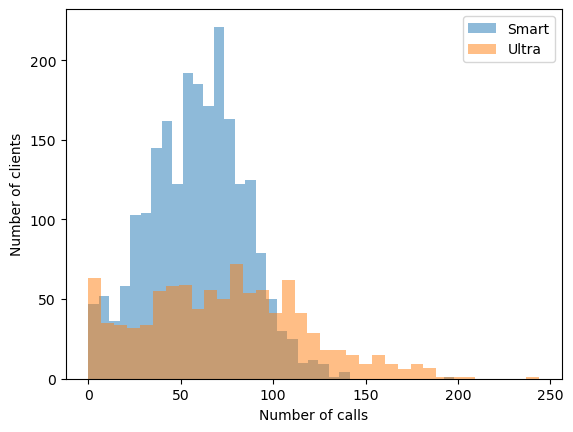

In [40]:
user_behavior.groupby('tariff')['calls'].plot(kind='hist', bins=35, alpha=0.5)
plt.legend(['Smart', 'Ultra'])
plt.xlabel('Number of calls')
plt.ylabel('Number of clients')
plt.show()

As well as the mean duration of the calls:

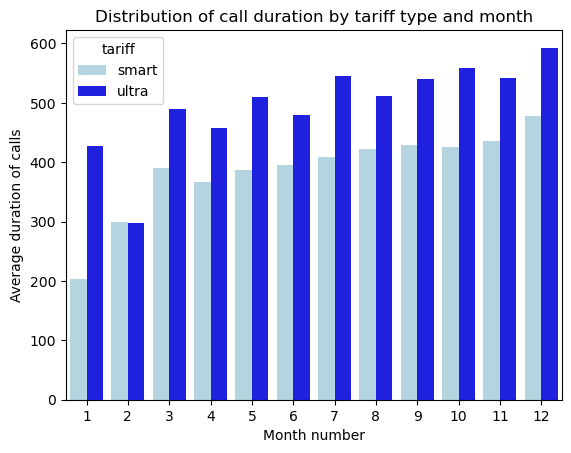

In [41]:
ax = sns.barplot(x='month',
            y='minutes_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue'])

ax.set_title('Distribution of call duration by tariff type and month')
ax.set(xlabel='Month number', ylabel='Average duration of calls');

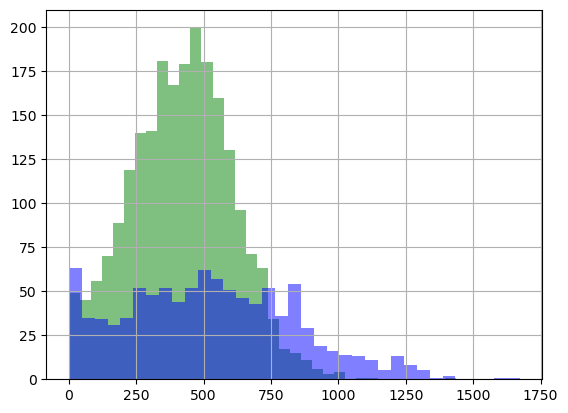

In [42]:
user_behavior[user_behavior['tariff'] =='smart']['minutes'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['minutes'].hist(bins=35, alpha=0.5, color='blue');

- The mean duration of calls for Ultra tariff subscribers is longer than for Smart subscribers.
- During the year, users of both tariffs increase the mean duration of their calls.
- The growth of the mean duration of calls for Smart subscribers is uniform throughout the year, while Ultra users do not show such a trend.
- In February, subscribers of both tariffs had the lowest rates.

#### Messages

Let's now look at the message distributions.

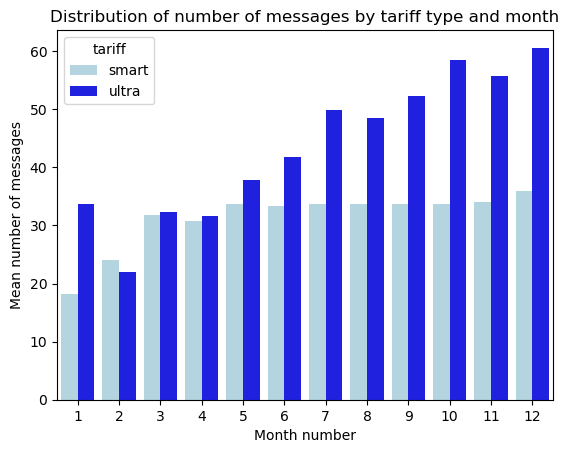

In [43]:
ax = sns.barplot(x='month',
            y='messages_mean',
            hue="tariff",
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Distribution of number of messages by tariff type and month')
ax.set(xlabel='Month number', ylabel='Mean number of messages');

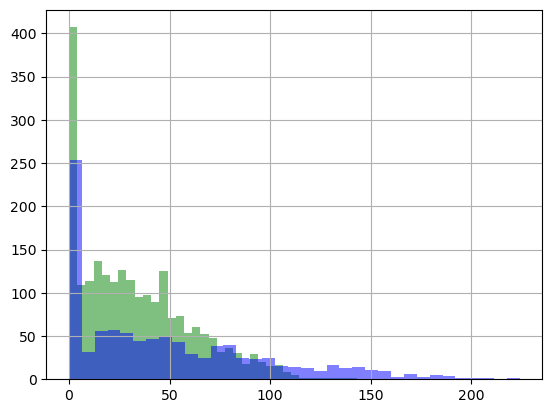

In [44]:
user_behavior[user_behavior['tariff'] =='smart']['messages'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['messages'].hist(bins=35, alpha=0.5, color='blue');

- The number of messages grows throughout the year on both tariffs.
- On average, Ultra users send more messages than Smart users (by almost 20 messages per month).
- The dynamics of sending messages is similar to the trends in the duration of conversations: in February, the lowest number of conversations for the year was observed, with Ultra users showing non-linear positive dynamics.

### Internet

Let's move on to the comparison of spent megabytes among users of Smart and Ultra tariffs.

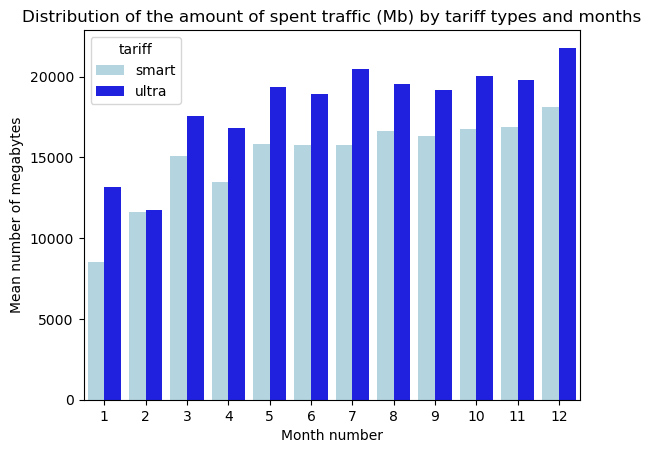

In [45]:
ax = sns.barplot(x='month',
            y='sessions_mean',
            hue='tariff',
            data=stats_df,
            palette=['lightblue', 'blue']
)

ax.set_title('Distribution of the amount of spent traffic (Mb) by tariff types and months')
ax.set(xlabel='Month number', ylabel='Mean number of megabytes');

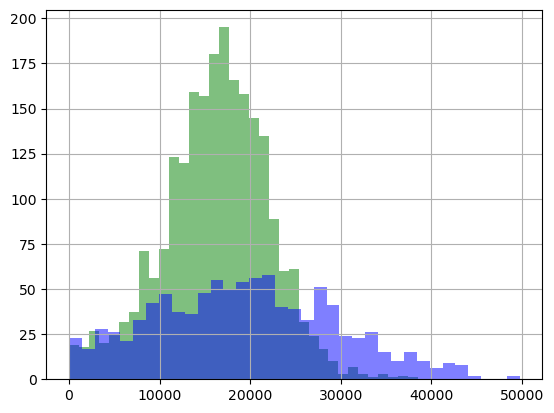

In [46]:
user_behavior[user_behavior['tariff'] =='smart']['mb_used'].hist(bins=35, alpha=0.5, color='green')
user_behavior[user_behavior['tariff'] =='ultra']['mb_used'].hist(bins=35, alpha=0.5, color='blue');

- Users use the Internet the least in January, February and April.
- Smart subscribers usually spend 15-17 GB, while Ultra subscribers spend 19-21 GB.

## Hypothesis testing

Let's test two hypotheses:
1. The mean revenue from users of Smart and Ultra tariffs differs.
2. The mean revenue from subscribers from Moscow differs from the mean revenue from subscribers from other regions.

### Difference by tariff

$H_0: Revenue\ from\ users\ of\ Ultra\ = Revenue\ from\ users\ of\ Smart$  
$H_1: Revenue\ from\ users\ of\ Ultra\ \neq Revenue\ from\ users\ of\ Smart$

In [47]:
results = (st.ttest_ind(
    user_behavior.query('tariff == "smart"')['total_cost'], 
    user_behavior.query('tariff == "ultra"')['total_cost'], 
    equal_var=False
))

alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failed to reject the null hypothesis')

4.2606313931076085e-250
Rejecting the null hypothesis


### Difference by city

$H_0: Revenue\ from\ users\ from\ Moscow\ = Revenue\ from\ users\ not\ from\ Moscow$  
$H_1: Revenue\ from\ users\ from\ Moscow\ \neq Revenue\ from\ users\ not\ from\ Moscow$

In [48]:
results = (st.ttest_ind(
    user_behavior.query('city == "Moscow"')['total_cost'], 
    user_behavior.query('city != "Moscow"')['total_cost'], 
    equal_var=False
))

alpha = 0.05

print(results.pvalue)
if results.pvalue < alpha:
    print('Rejecting the null hypothesis')
else:
    print('Failed to reject the null hypothesis')

0.5257376663729298
Failed to reject the null hypothesis


It turns out, one of the hypotheses was correct.